Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [30]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [32]:
# Code here
movies_df.drop(['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline'], inplace = True, axis = 1)

#### Remove any duplicate rows

In [33]:
# Code here
movies_df.drop_duplicates(keep=False)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [34]:
# Code here
# Create a temporary dataframe
temp_df = movies_df

# Remove all the rows that contain a missing value.
temp_df.dropna().head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [35]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
movies_df["year"] = movies_df['release_date'].dt.year
movies_df["year"]


0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: year, Length: 4803, dtype: float64

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [36]:
# Code here
budget_numbers = np.int64(movies_df['budget'])
revenue_numbers = np.int64(movies_df['revenue'])

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [37]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [38]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
1329,40000000,"['Romance', 'Comedy', 'Drama']",76494,27.009723,['United States of America'],2012-05-17,79700000,110.0,['English'],What to Expect When You're Expecting,5.8,594,2012.0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [39]:
# Create a dataframe with all the movies in the "Action" genre
def filter_genre(df, variable):
    genre = df[df["genres"].apply(lambda x: variable in x)]
    return genre
new_action_df = filter_genre(movies_df, "Action")

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

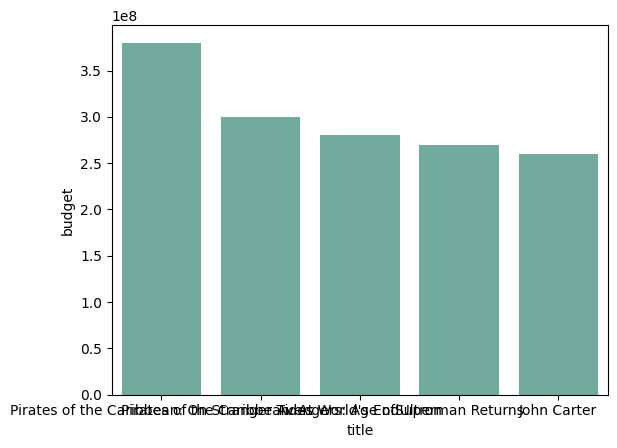

In [40]:
maxClm = movies_df.sort_values(by = "budget", ascending = False).head()
maxClm
chart = sns.barplot(
    x = "title",
    y = "budget", 
    data = maxClm, 
    estimator = sum, 
    errorbar = None,
    color = '#69b3a2')
#Hi thank you for looking at my task, I was wondering if you could please advice me on how to manipulate the X-axis labeling in a way that the names are
#visible without overlaping, as I tried using the "rotation = 90" but it gives out an error. 
#Thank you in advance 


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

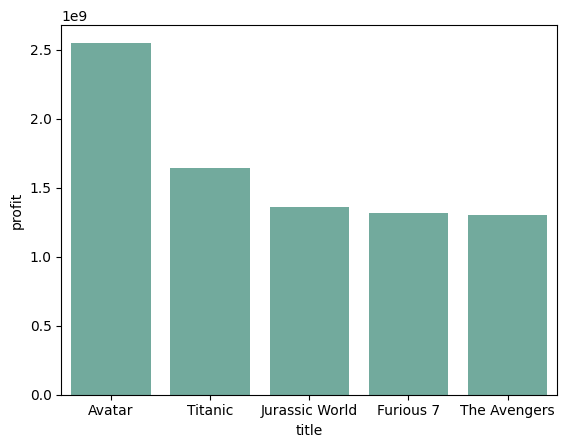

In [41]:
# Code here
profit = movies_df["revenue"] - movies_df["budget"]
movies_df["profit"] = profit 
max_profit = movies_df.sort_values(by = "profit", ascending = False).head()
max_profit
chart = sns.barplot(
    x = "title",
    y = "profit", 
    data = max_profit, 
    estimator = sum, 
    errorbar = None,
    color = '#69b3a2')


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

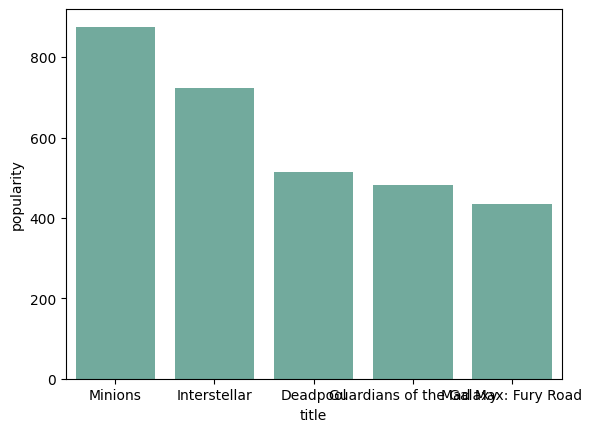

In [42]:
# Code here
max_popularity = movies_df.sort_values(by = "popularity", ascending = False).head()
max_popularity
chart = sns.barplot(
    x = "title",
    y = "popularity", 
    data = max_popularity, 
    estimator = sum, 
    errorbar = None,
    color = '#69b3a2')
#Same goes here, on how to avaid overlaping
#thank you 

#### Find Movies which are rated above 7

In [43]:
# Code here
good_movies = movies_df["vote_average"] > 7
movies_df["good_movies"] = good_movies
good_rating = movies_df.sort_values(by = "good_movies", ascending = False).head()
good_rating

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit,good_movies
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009.0,2550965087,True
3750,4000000,"['Adventure', 'Drama', 'History', 'Thriller', ...",5925,35.061467,['United States of America'],1963-06-20,11744471,172.0,"['English', 'Deutsch', 'Français', 'Pусский']",The Great Escape,7.8,717,1963.0,7744471,True
1260,10000000,"['Comedy', 'Romance']",194,73.720244,"['France', 'Germany']",2001-04-25,173921954,122.0,"['Français', 'Pусский']",Amélie,7.8,3310,2001.0,163921954,True
3737,114000,['Horror'],10331,25.666029,['United States of America'],1968-10-01,30000000,96.0,['English'],Night of the Living Dead,7.5,580,1968.0,29886000,True
1257,40000000,"['Adventure', 'Animation', 'Comedy', 'Family']",10315,41.258956,['United States of America'],2009-10-23,46471023,87.0,['English'],Fantastic Mr. Fox,7.5,1176,2009.0,6471023,True


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

<Axes: xlabel='count', ylabel='genres'>

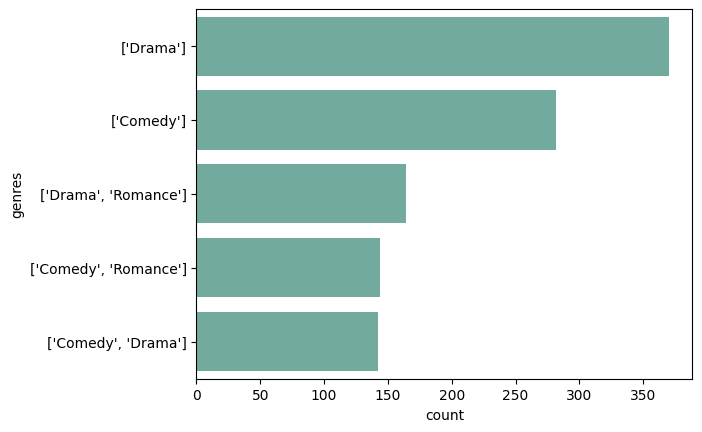

In [44]:
# Code here
genre_frequency = movies_df.explode("genres")
genre_frequency_values = genre_frequency["genres"].value_counts().head(5).index
genre_frequency_values
sns.countplot(
    order = genre_frequency_values,
    y = "genres", 
    data = genre_frequency,  
    color = '#69b3a2')
#I got a little bit confused with the correct way of identify the data here, in order to create a bar plot, would really appriciate your advice on how to 
#correctly handel it 

In [45]:
genre_frequency_values

Index(['['Drama']', '['Comedy']', '['Drama', 'Romance']',
       '['Comedy', 'Romance']', '['Comedy', 'Drama']'],
      dtype='object', name='genres')

In [46]:
genre_frequency.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit,good_movies
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009.0,2550965087,True
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007.0,661000000,False
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015.0,635674609,False
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012.0,834939099,True
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012.0,24139100,False


<Axes: >

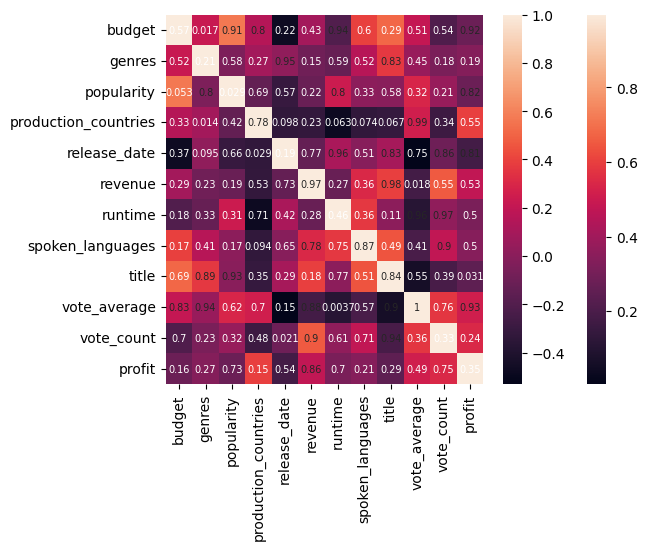

In [47]:
# Generate three different interesting visualisations with a data story.
#1- creating a heatmap could represnt further possible data relationships for experimentation 
df = pd.DataFrame(np.random.random((12,12)), columns=["budget","genres","popularity","production_countries","release_date","revenue","runtime","spoken_languages", "title", "vote_average", "vote_count", "profit"])
p1=sns.heatmap(df, annot=True, annot_kws={"size": 7})
sns.heatmap(df.corr())


<Axes: xlabel='budget', ylabel='Density'>

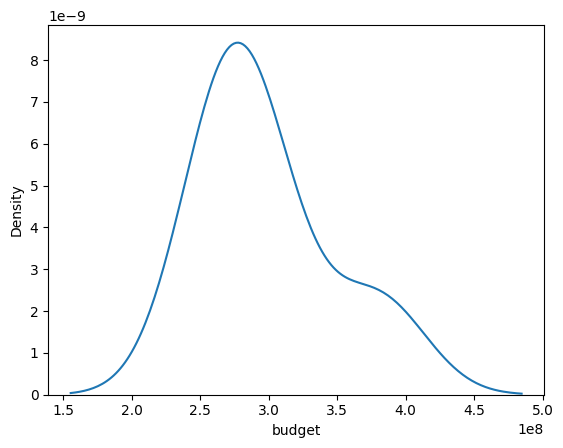

In [48]:
#2-using density plot for budget varibales of the top 5 most expensive movies, shows the distribution of data 
#here the density curve is left skewed, meaning that the mean is less than the median.
maxClm = movies_df.sort_values(by = "budget", ascending = False).head()
sns.kdeplot(maxClm["budget"])

<Axes: xlabel='popularity', ylabel='profit'>

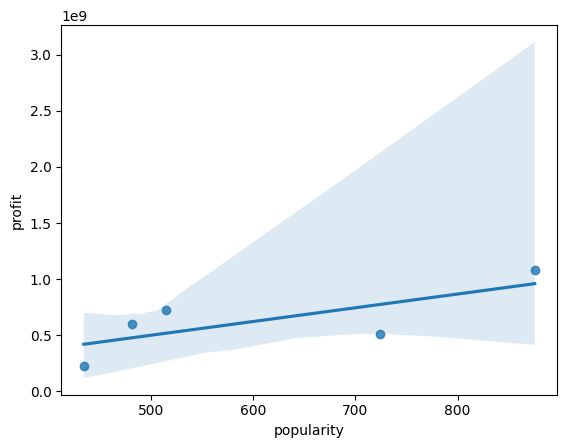

In [49]:
#3-creating a scatter plot for various variables form the data, could further show the correlations between them
max_popularity = movies_df.sort_values(by = "popularity", ascending = False).head()
sns.regplot(x=max_popularity["popularity"], y=max_popularity["profit"])